In [89]:
import random
import handcalcs.render
import math
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import binom
from matplotlib.pyplot import cm
import numpy as np
plt.style.use('dark_background')

In [90]:
def f_plot_bar(dict_result, bar_width, color_code):
    # key_max = max(dict_result, key=dict_result.get)
    # value_max = max(dict_result.values())
    # print("Maximum value on",key_max, ":", value_max)
    plt.bar(dict_result.keys(), dict_result.values(), width=bar_width, color=color_code)

def f_plot_curve(dict_result, color_code):
    # key_max = max(dict_result, key=dict_result.get)
    # value_max = max(dict_result.values())
    # print("Maximum value on",key_max, ":", value_max)
    plt.plot(dict_result.keys(), dict_result.values(), color=color_code)


# Binomial Distribution

In [91]:
# deterministic binomial PMF
# https://en.wikipedia.org/wiki/Binomial_distribution

class Binom:
    def __init__(self, n, p, k=0):
        self.n = n
        self.p = p
        self.k = k
        self.dict_result = {}
    # def binom_pmf_hc(self):
    #     self.PMF_hc = (math.factorial(self.n)/
    #         (math.factorial(self.k)*math.factorial(self.n-self.k)))*\
    #         self.p**(self.k) * (1-self.p)**(self.n-self.k)
    #     return self.PMF_hc
    def binom_p_hc(self):
        self.P_hc = (math.factorial(self.n)/
            (math.factorial(self.k)*math.factorial(self.n-self.k)))*\
            self.p**(self.k) * (1-self.p)**(self.n-self.k)
        return self.P_hc
    # def binom_pmf_sp(self):
    #     self.PMF_sp = binom.pmf(self.k, self.n, self.p) # binom.pmf(x, n, p)
    #     return self.PMF_sp
    def binom_p_sp(self):
        self.P_sp = binom.pmf(self.k, self.n, self.p) # binom.pmf(x, n, p)
        return self.P_sp
    def binom_cdf_sp(self):
        self.C_sp = binom.cdf(self.k, self.n, self.p) # binom.cdf(x, n, p)
        return self.C_sp



### Binomial Probability Mass Function
#### Hand Calculation

{0: 0.0625, 1: 0.25, 2: 0.375, 3: 0.25, 4: 0.0625}
Maximum value on 2 : 0.375


Text(0.5, 1.0, 'Binom PMF Hand Calc., p=0.5, n=4')

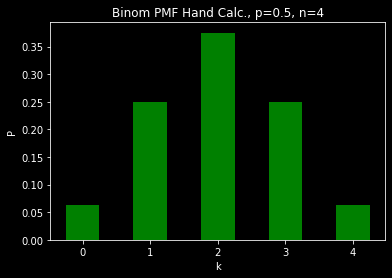

In [92]:
p = 0.5
n = 4
dict_result = {}

for k in range(n+1):
    binom_level4_hc = Binom(n, p, k) # (n, p, k=0)
    dict_result[k] = round(binom_level4_hc.binom_p_hc(),4)
print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
f_plot_bar(dict_result, 0.5, 'g')

plt.ylabel('P')
plt.xlabel('k')
plt.title('Binom PMF Hand Calc., p={}, n={}'.format(p,n))

#### Scipy Function

{0: 0.0625, 1: 0.25, 2: 0.375, 3: 0.25, 4: 0.0625}
Maximum value on 2 : 0.375


Text(0.5, 1.0, 'Binom PMF Scipy, p=0.5, n=4')

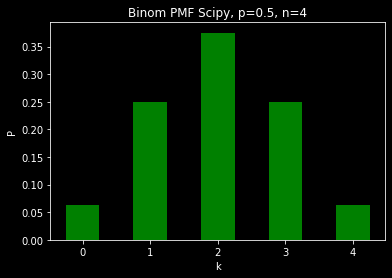

In [93]:
p = 0.5
n = 4
dict_result = {}

for k in range(n+1):
    binom_level4_sp = Binom(n, p, k) # (n, p, k=0)
    dict_result[k] = round(binom_level4_sp.binom_p_sp(),4)
print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
f_plot_bar(dict_result, 0.5, 'g')

plt.ylabel('P')
plt.xlabel('k')
plt.title('Binom PMF Scipy, p={}, n={}'.format(p,n))

### Simulasi Koin Fair
#### Peluang head pada 1 kesempatan toss

{0: 0.5, 1: 0.5}
Maximum value on 0 : 0.5


Text(0.5, 1.0, 'Deterministic Koin 1 Toss, p=0.5, n=1')

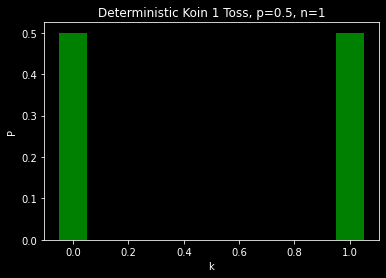

In [94]:
# deterministic

p = 0.5
n = 1
dict_result = {}

for k in range(n+1):
    binom_1_hc = Binom(n, p, k) # (n, p, k=0)
    dict_result[k] = round(binom_1_hc.binom_p_hc(),4)
print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
f_plot_bar(dict_result, 0.1, 'g')

plt.ylabel('P')
plt.xlabel('k')
plt.title('Deterministic Koin 1 Toss, p={}, n={}'.format(p,n))

{0: 0.5025, 1: 0.4975}
Maximum value on 0 : 0.5025


Text(0.5, 1.0, 'Stochastic Koin 1 Toss, p=0.5, n=1')

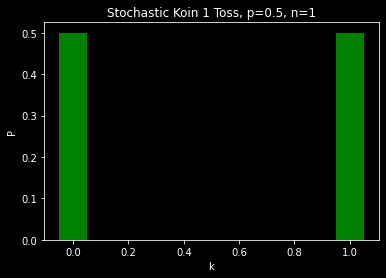

In [95]:
# stochastic

list_coin = ['head', 'tail']

list_result_head = []
iteration_count = 100_000
trials = 1

for i in range(iteration_count):
    count_trials = trials
    list_result = []
    counter_head = 0
    counter_tail = 0
    for i in range(count_trials):
        event = random.choice(list_coin)
        if event == 'head':
            counter_head += 1
    counter_tail = count_trials - counter_head
    list_result_head.append(counter_head)
    # print(counter_head)
    # print(counter_tail)

# print(list_result_head)
set_result_head = {i for i in range(trials+1)}
dict_result_head = {}
for i in set_result_head:
    dict_result_head[i] = round(list_result_head.count(i)/iteration_count,4)
print(dict_result_head)

key_max = max(dict_result_head, key=dict_result_head.get)
value_max = max(dict_result_head.values())
print("Maximum value on",key_max, ":", value_max)
# print("Pr on 1:", dict_result_head[1])

f_plot_bar(dict_result, 0.1, 'g')

plt.ylabel('P')
plt.xlabel('k')
plt.title('Stochastic Koin 1 Toss, p={}, n={}'.format(p,n))

#### Peluang jumlah tepat head pada 6 kesempatan toss

{0: 0.0156, 1: 0.0938, 2: 0.2344, 3: 0.3125, 4: 0.2344, 5: 0.0938, 6: 0.0156}
Maximum value on 3 : 0.3125


Text(0.5, 1.0, 'Deterministic Koin 6 Toss, p=0.5, n=6')

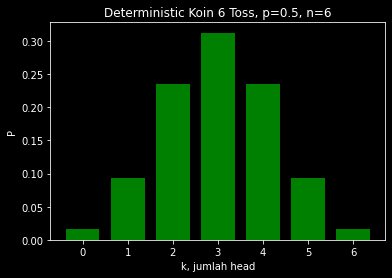

In [96]:
# deterministic

p = 0.5
n = 6
dict_result = {}

for k in range(n+1):
    binom_1_hc = Binom(n, p, k) # (n, p, k=0)
    dict_result[k] = round(binom_1_hc.binom_p_hc(),4)
print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)

f_plot_bar(dict_result, 0.75, 'g')

plt.ylabel('P')
plt.xlabel('k, jumlah head')
plt.title('Deterministic Koin 6 Toss, p={}, n={}'.format(p,n))

{0: 0.0158, 1: 0.0937, 2: 0.2327, 3: 0.3162, 4: 0.2337, 5: 0.0926, 6: 0.0153}
Maximum value on 3 : 0.3162


Text(0.5, 1.0, 'Stochastic Koin 6 Toss, p=0.5, n=6')

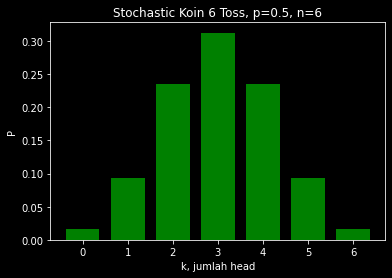

In [97]:
# stochastic

list_coin = ['head', 'tail']

list_result_head = []
iteration_count = 100_000
trials = 6

for i in range(iteration_count):
    count_trials = trials
    list_result = []
    counter_head = 0
    counter_tail = 0
    for i in range(count_trials):
        event = random.choice(list_coin)
        if event == 'head':
            counter_head += 1
    counter_tail = count_trials - counter_head
    list_result_head.append(counter_head)
    # print(counter_head)
    # print(counter_tail)

# print(list_result_head)
set_result_head = {i for i in range(trials+1)}
dict_result_head = {}
for i in set_result_head:
    dict_result_head[i] = round(list_result_head.count(i)/iteration_count,4)
print(dict_result_head)

key_max = max(dict_result_head, key=dict_result_head.get)
value_max = max(dict_result_head.values())
print("Maximum value on",key_max, ":", value_max)

f_plot_bar(dict_result, 0.75, 'g')

plt.ylabel('P')
plt.xlabel('k, jumlah head')
plt.title('Stochastic Koin 6 Toss, p={}, n={}'.format(p,n))

### Simulasi Dadu
#### Peluang six pada 1 kesempatan roll

{0: 0.8333, 1: 0.1667}
Maximum value on 0 : 0.8333
Pr on 1 six on 1 roll: 0.1667


Text(0.5, 1.0, 'Deterministic Dadu 1 Roll, p=0.1667, n=1')

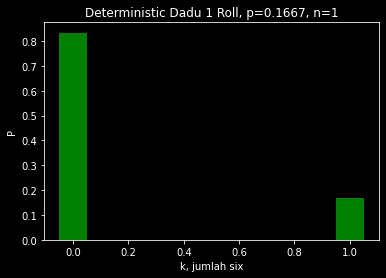

In [98]:
# determininstic

p = 1/6
n = 1
dict_result = {}

for k in range(n+1):
    dadu_enam_1 = Binom(n, p, k) # (n, p, k=0)
    dict_result[k] = round(dadu_enam_1.binom_p_hc(),4)
print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
print("Pr on 1 six on 1 roll:", dict_result[1])

f_plot_bar(dict_result, 0.1, 'g')

plt.ylabel('P')
plt.xlabel('k, jumlah six')
plt.title('Deterministic Dadu 1 Roll, p={}, n={}'.format(round(p,4),n))

{0: 0.8332, 1: 0.1668}
Maximum value on 0 : 0.8332
Pr on 1 six on 1 roll: 0.1668


Text(0.5, 1.0, 'Stochastic Dadu 1 Roll, p=0.1667, n=1')

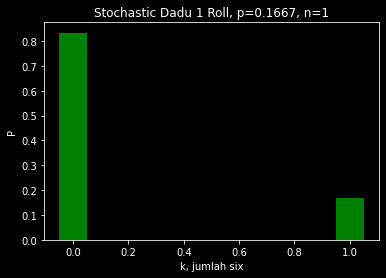

In [99]:
# stochastic

list_die = ['one', 'two', 'three', 'four', 'five', 'six']

list_result_six = []
iteration_count = 100_000
trials = 1

for i in range(iteration_count):
    count_trials = trials
    list_result = []
    counter_six = 0
    for i in range(count_trials):
        event = random.choice(list_die)
        if event == 'six':
            counter_six += 1
    counter_non_six = count_trials - counter_six
    list_result_six.append(counter_six)
    # print(counter_head)
    # print(counter_tail)

# print(list_result_head)
set_result_six = {i for i in range(trials+1)}
dict_result_six = {}
for i in set_result_six:
    dict_result_six[i] = round(list_result_six.count(i)/iteration_count,4)
print(dict_result_six)

key_max = max(dict_result_six, key=dict_result_six.get)
value_max = max(dict_result_six.values())
print("Maximum value on",key_max, ":", value_max)
print("Pr on 1 six on 1 roll:", dict_result_six[1])

f_plot_bar(dict_result, 0.1, 'g')

plt.ylabel('P')
plt.xlabel('k, jumlah six')
plt.title('Stochastic Dadu 1 Roll, p={}, n={}'.format(round(p,4),n))

#### Peluang six pada 3 kesempatan roll

{0: 0.5787, 1: 0.3472, 2: 0.0694, 3: 0.0046}
Maximum value on 0 : 0.5787
Pr on 2 six on 3 roll: 0.0694


Text(0.5, 1.0, 'Deterministic Dadu 3 Roll, p=0.1667, n=3')

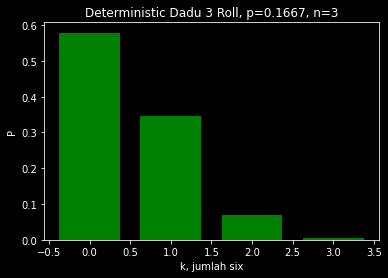

In [100]:
# deterministic

p = 1/6
n = 3
dict_result = {}

for k in range(n+1):
    dadu_enam_1 = Binom(n, p, k) # (n, p, k=0)
    dict_result[k] = round(dadu_enam_1.binom_p_hc(),4)
print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
print("Pr on 2 six on 3 roll:", dict_result[2])

f_plot_bar(dict_result, 0.75, 'g')

plt.ylabel('P')
plt.xlabel('k, jumlah six')
plt.title('Deterministic Dadu 3 Roll, p={}, n={}'.format(round(p,4),n))

{0: 0.5787, 1: 0.9259, 2: 0.9954, 3: 1.0}
Maximum value on 3 : 1.0
Pr on 2 six on 3 roll: 0.9954


Text(0.5, 1.0, 'Deterministic Dadu 3 Roll, p=0.1667, n=3')

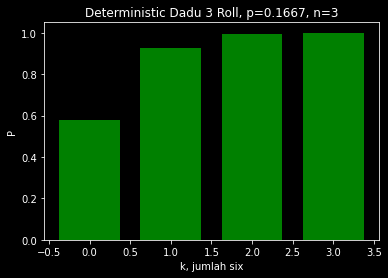

In [101]:
# deterministic + Cumulative

p = 1/6
n = 3
dict_result = {}
C_ = 0

for k in range(n+1):
    dadu_enam_1 = Binom(n, p, k) # (n, p, k=0)
    C_ = dadu_enam_1.binom_cdf_sp()
    dict_result[k] = round(C_,4)
print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
print("Pr on 2 six on 3 roll:", dict_result[2])

f_plot_bar(dict_result, 0.75, 'g')

plt.ylabel('P')
plt.xlabel('k, jumlah six')
plt.title('Deterministic Dadu 3 Roll, p={}, n={}'.format(round(p,4),n))

{0: 1.0, 1: 1.0, 2: 1.0, 3: 0.9954, 4: 0.9838, 5: 0.9645, 6: 0.9377, 7: 0.9042, 8: 0.8652, 9: 0.8217, 10: 0.7752, 11: 0.7268, 12: 0.6774, 13: 0.6281, 14: 0.5795, 15: 0.5322, 16: 0.4868, 17: 0.4435, 18: 0.4027, 19: 0.3643}
Maximum value on 0 : 1.0
Pr on 2 six on 3 roll: 0.9954


Text(0.5, 1.0, 'Deterministic Dadu n Roll, k=2')

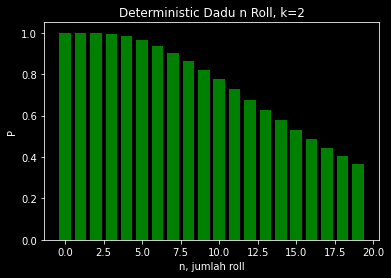

In [102]:
# deterministic + Cumulative 

p = 1/6
k = 2
dict_result = {}
C_ = 0

for n in range(20):
    dadu_enam_1 = Binom(n, p, k) # (n, p, k=0)
    C_ = dadu_enam_1.binom_cdf_sp()
    dict_result[n] = round(C_,4)
print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
print("Pr on 2 six on 3 roll:", dict_result[3])

f_plot_bar(dict_result, 0.75, 'g')

plt.ylabel('P')
plt.xlabel('n, jumlah roll')
plt.title('Deterministic Dadu n Roll, k={}'.format(k))

{0: 0.5784, 1: 0.3467, 2: 0.0704, 3: 0.0045}
Maximum value on 0 : 0.5784
Pr on 2 six on 3 roll: 0.0704


Text(0.5, 1.0, 'Stochastic Dadu 3 Roll, p=0.1667, n=19')

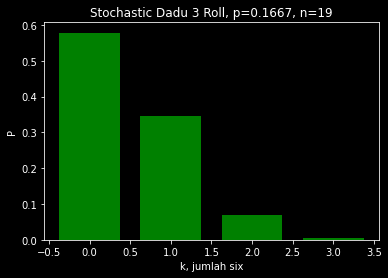

In [103]:
# stochastic

list_die = ['one', 'two', 'three', 'four', 'five', 'six']

list_result_six = []
iteration_count = 100_000
trials = 3

for i in range(iteration_count):
    count_trials = trials
    list_result = []
    counter_six = 0
    for i in range(count_trials):
        event = random.choice(list_die)
        if event == 'six':
            counter_six += 1
    counter_non_six = count_trials - counter_six
    list_result_six.append(counter_six)
    # print(counter_head)
    # print(counter_tail)

# print(list_result_head)
set_result_six = {i for i in range(trials+1)}
dict_result_six = {}
for i in set_result_six:
    dict_result_six[i] = round(list_result_six.count(i)/iteration_count,4)
print(dict_result_six)

key_max = max(dict_result_six, key=dict_result_six.get)
value_max = max(dict_result_six.values())
print("Maximum value on",key_max, ":", value_max)
print("Pr on 2 six on 3 roll:", dict_result_six[2])

f_plot_bar(dict_result_six, 0.75, 'g')

plt.ylabel('P')
plt.xlabel('k, jumlah six')
plt.title('Stochastic Dadu 3 Roll, p={}, n={}'.format(round(p,4),n))

{0: 0.5773, 1: 0.9245, 2: 0.9956, 3: 1.0}
Maximum value on 3 : 1.0
Pr on 2 six on 3 roll: 0.9956


Text(0.5, 1.0, 'Stochastic Dadu 3 Roll, p=0.1667, n=19')

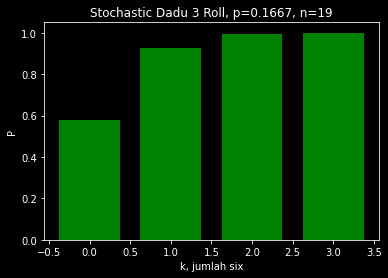

In [104]:
# stochastic + Cumulative

list_die = ['one', 'two', 'three', 'four', 'five', 'six']

list_result_six = []
iteration_count = 100_000
trials = 3

for i in range(iteration_count):
    count_trials = trials
    list_result = []
    counter_six = 0
    for i in range(count_trials):
        event = random.choice(list_die)
        if event == 'six':
            counter_six += 1
    counter_non_six = count_trials - counter_six
    list_result_six.append(counter_six)
    # print(counter_head)
    # print(counter_tail)

# print(list_result_head)
set_result_six = {i for i in range(trials+1)}
dict_result_six = {}
C_ = 0
for i in set_result_six:
    C_ += list_result_six.count(i)/iteration_count
    dict_result_six[i] = round(C_,4)
print(dict_result_six)

key_max = max(dict_result_six, key=dict_result_six.get)
value_max = max(dict_result_six.values())
print("Maximum value on",key_max, ":", value_max)
print("Pr on 2 six on 3 roll:", dict_result_six[2])

f_plot_bar(dict_result_six, 0.75, 'g')

plt.ylabel('P')
plt.xlabel('k, jumlah six')
plt.title('Stochastic Dadu 3 Roll, p={}, n={}'.format(round(p,4),n))

In [105]:
# stochastic + Cumulative <<<<<<2022.07.19

#### Binomial count_sample = 50, success_rate = 0.95

Maximum value on 48 : 0.2611


Text(0.5, 1.0, 'Deterministic Binomial, p=0.95, n=50')

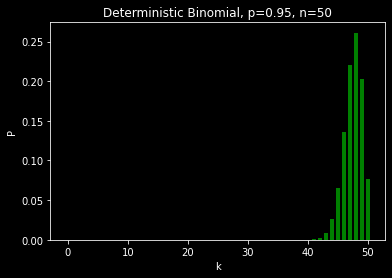

In [106]:
# deteriministic

p = 0.95
n = 50
dict_result = {}

for k in range(n+1):
    binom_1 = Binom(n, p, k) # (n, p, k=0)
    dict_result[k] = round(binom_1.binom_p_hc(),4)
# print(dict_result)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)

f_plot_bar(dict_result, 0.75, 'g')

plt.ylabel('P')
plt.xlabel('k')
plt.title('Deterministic Binomial, p={}, n={}'.format(p,n))

Maximum value on 48 : 0.2618


Text(0.5, 1.0, 'Stochastic Binomial, p=0.95, n=50')

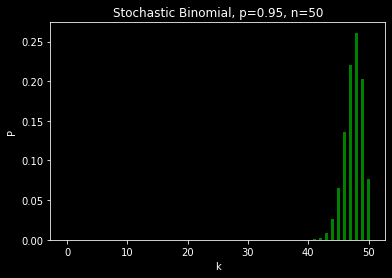

In [107]:
# stochastic
# https://www.youtube.com/watch?v=8idr1WZ1A7Q

success_rate = 0.95

list_result_ok = []
iteration_count = 100_000


for i in range(iteration_count):
    count_sample = 50
    list_review = []
    counter_ok = 0
    counter_nok = 0
    for i in range(count_sample):
        review = random.random()
        if review > success_rate:
            counter_nok += 1
    counter_ok = count_sample - counter_nok
    list_result_ok.append(counter_ok)
    # print(counter_ok)
    # print(counter_nok)

# print(list_result_ok)
# set_result_ok = set(list_result_ok)
set_result_ok = {i for i in range(count_sample+1)}
dict_result_ok = {}
for i in set_result_ok:
    dict_result_ok[i] = round(list_result_ok.count(i)/iteration_count,4)
# print(dict_result_ok)

key_max = max(dict_result_ok, key=dict_result_ok.get)
value_max = max(dict_result_ok.values())
print("Maximum value on",key_max, ":", value_max)

f_plot_bar(dict_result, 0.5, 'g')

plt.ylabel('P')
plt.xlabel('k')
plt.title('Stochastic Binomial, p={}, n={}'.format(p,n))

### Binomial PMF
#### sample n=30, c=3, p=1%

Maximum value on 0.1 : 0.2361


Text(0.5, 1.0, 'Deterministic Binomial PMF, p=0.99, n=30')

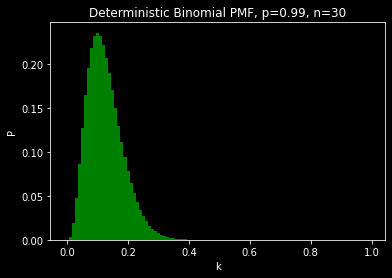

In [108]:
n = 30
k = 3
range_ = 100
dict_result = {}

for p_ in range(range_):
    p = p_/100
    binom_simul_pmf = Binom(n, p, k)
    dict_result[p] = round(binom_simul_pmf.binom_p_hc(),4)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)

f_plot_bar(dict_result, 0.01, 'g')

plt.ylabel('P')
plt.xlabel('k')
plt.title('Deterministic Binomial PMF, p={}, n={}'.format(p,n))

## OC Curve with Binomial Method
https://accendoreliability.com/oc-curve-with-binomial-method/

Let’s say we have lot’s of 500 units and we’re are considering using the ANSI/ASQ Z1.4 – 2008 Sampling Procedures and Tables for Inspection by Attributes S-3 inspection level and single sampling plan. It directs us to select 8 samples from each lot. The acceptance is with no defects in the sample, c=0 and reject the lot is there is one defect in the sample.

BINOMIAL
n: 8
c: 0
Maximum value on 0.0 : 1.0
P on p=0.03: 0.7837
P on p=0.05: 0.6634
P on p=0.1: 0.4305
P on p=0.3: 0.0576
P on p=0.5: 0.0039
P on p=0.7: 0.0001
P on p=0.9: 0.0


Text(0.5, 1.0, 'binom PMF c=0, n=8')

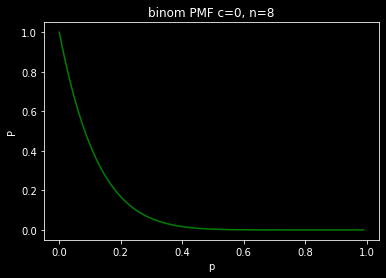

In [109]:
k = d = 0 # k,d: jumlah defects;
c = 0 # c: jumlah defects bisa diterima
n = 8 # jumlah sample dari lot

dict_result = {}

for p_ in range(100):
    p = p_/100
    binom_simul_pmf = Binom(n, p, k)
    dict_result[p] = round(binom_simul_pmf.binom_p_hc(),4)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('BINOMIAL')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.03:", round(dict_result[0.03],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.3:", round(dict_result[0.3],4))
print("P on p=0.5:", round(dict_result[0.5],4))
print("P on p=0.7:", round(dict_result[0.7],4))
print("P on p=0.9:", round(dict_result[0.9],4))

f_plot_curve(dict_result, 'g')
plt.ylabel('P')
plt.xlabel('p')
plt.title('binom PMF c={}, n={}'.format(c, n))

BINOMIAL
n: 8
c: 3
Maximum value on 0.37 : 0.2815
P on p=0.03: 0.0013
P on p=0.05: 0.0054
P on p=0.1: 0.0331
P on p=0.3: 0.2541
P on p=0.5: 0.2188
P on p=0.7: 0.0467
P on p=0.9: 0.0004


Text(0.5, 1.0, 'binom PMF c=3, n=8')

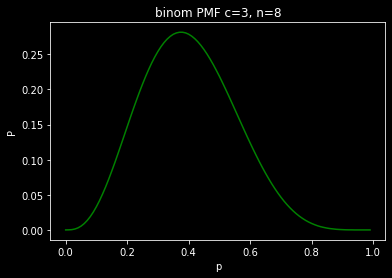

In [110]:
c = 3 # jumlah defects bisa diterima
n = 8 # jumlah sample dari lot
k = c
dict_result = {}

for p_ in range(100):
    p = p_/100
    binom_simul_pmf = Binom(n, p, k)
    dict_result[p] = round(binom_simul_pmf.binom_p_hc(),4)

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('BINOMIAL')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.03:", round(dict_result[0.03],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.3:", round(dict_result[0.3],4))
print("P on p=0.5:", round(dict_result[0.5],4))
print("P on p=0.7:", round(dict_result[0.7],4))
print("P on p=0.9:", round(dict_result[0.9],4))

f_plot_curve(dict_result, 'g')
plt.ylabel('P')
plt.xlabel('p')
plt.title('binom PMF c={}, n={}'.format(c, n))

BINOMIAL
n: 8
c: 3
Maximum value on 0.0 : 1.0
P on p=0.03: 0.9999
P on p=0.05: 0.9996
P on p=0.1: 0.995
P on p=0.3: 0.8059
P on p=0.5: 0.3633
P on p=0.7: 0.058
P on p=0.9: 0.0004


Text(0.5, 1.0, 'binom scipy CDF c=3, n=8')

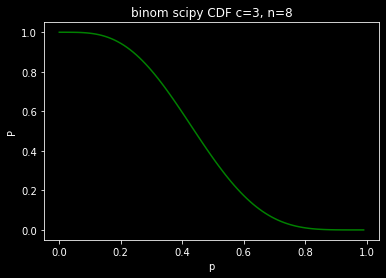

In [111]:
c = 3 # jumlah defects bisa diterima
n = 8 # jumlah sample dari lot
k = c
dict_result = {}

for p_ in range(100):
    p = p_/100
    binom_simul_cdf = Binom(n, p, k) # Binom(n, p, k)
    dict_result[p] = round(binom_simul_cdf.binom_cdf_sp(),4) # binom scipy

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('BINOMIAL')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.03:", round(dict_result[0.03],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.3:", round(dict_result[0.3],4))
print("P on p=0.5:", round(dict_result[0.5],4))
print("P on p=0.7:", round(dict_result[0.7],4))
print("P on p=0.9:", round(dict_result[0.9],4))

f_plot_curve(dict_result, 'g')
plt.ylabel('P')
plt.xlabel('p')
plt.title('binom scipy CDF c={}, n={}'.format(c, n))

P on p=0.05: 0.6634
P on p=0.05: 0.9428
P on p=0.05: 0.9942


Text(0.5, 1.0, 'binom scipy CDF, w/ number of samples n=8')

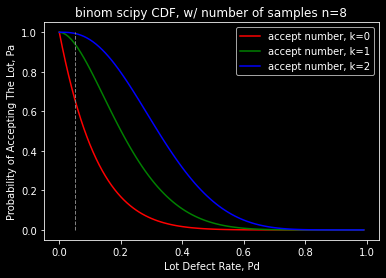

In [112]:
# c = 3 # jumlah defects bisa diterima
n = 8 # jumlah sample dari lot
k = c # jumlah defects bisa diterima

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y']
color_iter = iter(color_list)

for k in range (3):
    dict_result = {}
    for p_ in range(100):
        p = p_/100
        binom_simul_cdf = Binom(n, p, k) # Binom(n, p, k)
        dict_result[p] = round(binom_simul_cdf.binom_cdf_sp(),4)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    # print("P on p=0.03:", round(dict_result[0.03],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    # print("P on p=0.1:", round(dict_result[0.1],4))
    # print("P on p=0.2:", round(dict_result[0.2],4))
    # print("P on p=0.3:", round(dict_result[0.3],4))
    # print("P on p=0.5:", round(dict_result[0.5],4))
    # print("P on p=0.7:", round(dict_result[0.7],4))
    # print("P on p=0.9:", round(dict_result[0.9],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('accept number, k='+str(k))

line_x = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF, w/ number of samples n={}'.format(n))


BINOMIAL
n: 50
k: 0
Maximum value on 0.0 : 1.0
P on p=0.015: 0.4697
P on p=0.05: 0.0769
P on p=0.1: 0.0052
P on p=0.2: 0.0


Text(0.5, 1.0, 'binom scipy CDF, w/ accept number k=0')

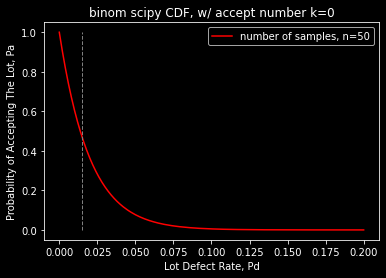

In [113]:
# https://accendoreliability.com/how-to-read-an-oc-curve/
# c = 3 # jumlah defects bisa diterima
# n = 8 # jumlah sample dari lot
k = 0 # jumlah defects bisa diterima

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y']
color_iter = iter(color_list)

for n in [50]:
    dict_result = {}
    for p_ in range(201):
        p = p_/1000
        binom_simul_cdf = Binom(n, p, k) # Binom(n, p, k)
        dict_result[p] = round(binom_simul_cdf.binom_cdf_sp(),4)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    print('BINOMIAL')
    print("n:", n)
    print("k:", k)
    print("Maximum value on",key_max, ":", value_max)
    print("P on p=0.015:", round(dict_result[0.015],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    print("P on p=0.1:", round(dict_result[0.1],4))
    print("P on p=0.2:", round(dict_result[0.2],4))
    # print("P on p=0.3:", round(dict_result[0.3],4))
    # print("P on p=0.5:", round(dict_result[0.5],4))
    # print("P on p=0.7:", round(dict_result[0.7],4))
    # print("P on p=0.9:", round(dict_result[0.9],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('number of samples, n='+str(n))

line_x = [0.015, 0.015]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF, w/ accept number k={}'.format(k))


P on p=0.05: 0.8145
P on p=0.05: 0.7351
P on p=0.05: 0.6634
P on p=0.05: 0.5987


Text(0.5, 1.0, 'binom scipy CDF, w/ accept number k=0')

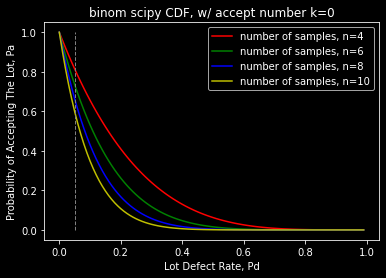

In [114]:
# c = 3 # jumlah defects bisa diterima
# n = 8 # jumlah sample dari lot
k = 0 # jumlah defects bisa diterima

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y']
color_iter = iter(color_list)

for n in [4,6,8,10]:
    dict_result = {}
    for p_ in range(100):
        p = p_/100
        binom_simul_cdf = Binom(n, p, k) # Binom(n, p, k)
        dict_result[p] = round(binom_simul_cdf.binom_cdf_sp(),4)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    # print("P on p=0.03:", round(dict_result[0.03],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    # print("P on p=0.1:", round(dict_result[0.1],4))
    # print("P on p=0.2:", round(dict_result[0.2],4))
    # print("P on p=0.3:", round(dict_result[0.3],4))
    # print("P on p=0.5:", round(dict_result[0.5],4))
    # print("P on p=0.7:", round(dict_result[0.7],4))
    # print("P on p=0.9:", round(dict_result[0.9],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('number of samples, n='+str(n))

line_x = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF, w/ accept number k={}'.format(k))


In [115]:
# c = 3 # jumlah defects bisa diterima
n = 8 # jumlah sample dari lot
k = c # jumlah defects bisa diterima

# Cumulative Density berdasrkan penambahan Probability Mass Function Scipy k=0,1,2
Pa = 0
for k in range(3):
    p = 0.05
    binom_simul = Binom(n, p, k) # Binom(n, p, k)
    print(round(binom_simul.binom_p_sp(),4))
    Pa += round(binom_simul.binom_p_sp(),4)
    print(Pa)

print('')

# Cumulative Density Function Scipy n=8, p=0,05, k=2
Pa = 0
binom_simul = Binom(n=8, p=0.05, k=2) # Binom(n, p, k)
Pa = binom_simul.binom_cdf_sp()
print(round(Pa,4))
print('')


# Probability Mass Function
n, p, k = 8, 0.05, 0
binom_simul = Binom(n, p, k) # Binom(n, p, k)
Pa = round(binom_simul.binom_p_sp(),4)
Pb = round(binom.pmf(k, n, p),4)
print(Pa)
print(Pb)


0.6634
0.6634
0.2793
0.9427
0.0515
0.9942

0.9942

0.6634
0.6634


# Poisson Distribution

In [116]:
# deterministic poisson PMF
# https://en.wikipedia.org/wiki/Poisson_distribution
# https://en.wikipedia.org/wiki/Floor_and_ceiling_functions

from math import factorial


class Poisson:
    def __init__(self, k, lambda_):
        self.k = k
        self.lambda_ = lambda_
    
    def poisson_p_hc(self):
        self.P_hc = self.lambda_**k * math.exp(-self.lambda_) / math.factorial(self.k)
        return self.P_hc
    
    def poisson_c_hc(self):
        self.sum_ = 0
        for i in range(math.floor(self.k)):
            self.sum_ += self.lambda_**i / math.factorial(i) 
        self.C_hc = math.exp(-self.lambda_)*self.sum_
        return self.C_hc
    
    def poisson_p_sp(self):
        self.P_sp = poisson.pmf(self.k, self.lambda_) # poisson.pmf(k, mu, loc)
        return self.P_sp
    
    def poisson_c_sp(self):
        self.C_sp = poisson.cdf(self.k, self.lambda_) # poisson.cdf(k, mu, loc)
        return self.C_sp

Maximum value on 3 : 0.1954
P on 7: 0.0595


Text(0.5, 1.0, 'Poisson PMF, w/ Avg Questions, lambda=4')

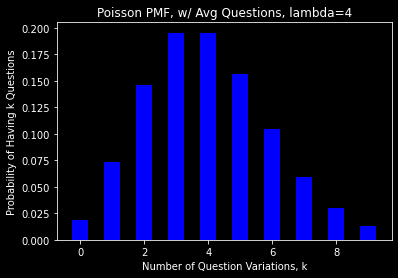

In [117]:
# https://www.youtube.com/watch?v=BbLfV0wOeyc
# average daily questions = 4
# how likely to have 7 questions

# deterministic
lambda_ = 4

dict_result = {}
for k in range(10):
    poisson_1_hc = Poisson(k, lambda_)
    dict_result[k] = round(poisson_1_hc.poisson_p_hc(),4)
# print(dict_result)
key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
print("P on 7:", dict_result[7])

f_plot_bar(dict_result, 0.5, 'b')
plt.ylabel('Probability of Having k Questions')
plt.xlabel('Number of Question Variations, k')
plt.title('Poisson PMF, w/ Avg Questions, lambda={}'.format(lambda_))

Maximum value on 9 : 0.9919
P on 7: 0.9489


Text(0.5, 1.0, 'Poisson CDF, w/ Avg Questions, lambda=4')

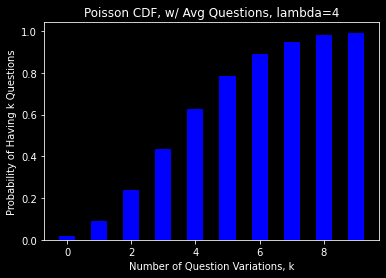

In [118]:
# https://www.youtube.com/watch?v=BbLfV0wOeyc
# average daily questions = 4
# how likely to have 7 questions

# deterministic
lambda_ = 4

dict_result = {}
for k in range(10):
    poisson_c_sp = Poisson(k, lambda_)
    dict_result[k] = round(poisson_c_sp.poisson_c_sp(),4)
# print(dict_result)
key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
print("P on 7:", dict_result[7])

f_plot_bar(dict_result, 0.5, 'b')
plt.ylabel('Probability of Having k Questions')
plt.xlabel('Number of Question Variations, k')
plt.title('Poisson CDF, w/ Avg Questions, lambda={}'.format(lambda_))

Maximum value on 0 : 1.0
P on lambda_=4: 0.9489


Text(0.5, 1.0, 'Poisson CDF, w/ Number of Questions, k=7')

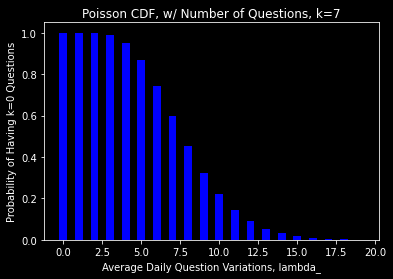

In [119]:
# https://www.youtube.com/watch?v=BbLfV0wOeyc
# average daily questions = lambda_
# how likely to have 0 questions

# deterministic
k = 7

dict_result = {}
for lambda_ in range(20):
    poisson_c_sp = Poisson(k, lambda_)
    dict_result[lambda_] = round(poisson_c_sp.poisson_c_sp(),4)
# print(dict_result)
key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print("Maximum value on",key_max, ":", value_max)
print("P on lambda_=4:", dict_result[4])

f_plot_bar(dict_result, 0.5, 'b')
plt.ylabel('Probability of Having k=0 Questions')
plt.xlabel('Average Daily Question Variations, lambda_')
plt.title('Poisson CDF, w/ Number of Questions, k={}'.format(k))

# OC Curve with Poisson Method

POISSON
n: 8
c: 0
Maximum value on 0.0 : 1.0
P on p=0.03: 0.7866
P on p=0.05: 0.6703
P on p=0.1: 0.4493
P on p=0.3: 0.0907
P on p=0.5: 0.0183
P on p=0.7: 0.0037
P on p=0.9: 0.0007


Text(0.5, 1.0, 'poisson PMF c=0, n=8')

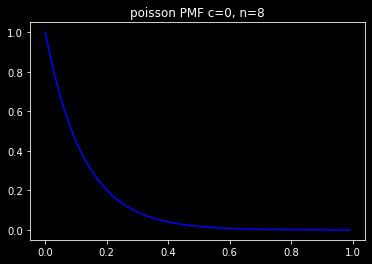

In [120]:
# http://myplace.frontier.com/~stevebrainerd1/STATISTICS/ECE-580-DOE%20WEEK%203_files/class2_oc_curve.pdf

# deterministic
n = 8 # jumlah sample dari lot
c = k = x = 0 # jumlah defects bisa diterima

dict_result = {}
for p_ in range(100):
    p = p_/100
    lambda_ = n*p
    poisson_2_hc = Poisson(k, lambda_)
    P = round(poisson_2_hc.poisson_p_hc(),4)
    dict_result[p] = P

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('POISSON')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.03:", round(dict_result[0.03],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.3:", round(dict_result[0.3],4))
print("P on p=0.5:", round(dict_result[0.5],4))
print("P on p=0.7:", round(dict_result[0.7],4))
print("P on p=0.9:", round(dict_result[0.9],4))

# plt.bar(dict_result.keys(), dict_result.values(), width=.01, color='b')
plt.plot(dict_result.keys(), dict_result.values(), color='b')
plt.title('poisson PMF c={}, n={}'.format(c, n))


POISSON
n: 8
c: 3
Maximum value on 0.37 : 0.224
P on p=0.03: 0.0018
P on p=0.05: 0.0072
P on p=0.1: 0.0383
P on p=0.3: 0.209
P on p=0.5: 0.1954
P on p=0.7: 0.1082
P on p=0.9: 0.0464


Text(0.5, 1.0, 'poisson PMF c=3, n=8')

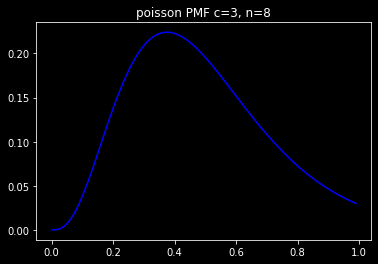

In [121]:
# http://myplace.frontier.com/~stevebrainerd1/STATISTICS/ECE-580-DOE%20WEEK%203_files/class2_oc_curve.pdf

# deterministic
n = 8 # jumlah sample dari lot
c = k = x = 3 # jumlah defects bisa diterima

dict_result = {}
for p_ in range(100):
    p = p_/100
    lambda_ = n*p
    poisson_2_hc = Poisson(k, lambda_) # poisson.pmf(x, mu)
    P = round(poisson_2_hc.poisson_p_hc(),4)
    dict_result[p] = P

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('POISSON')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.03:", round(dict_result[0.03],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.3:", round(dict_result[0.3],4))
print("P on p=0.5:", round(dict_result[0.5],4))
print("P on p=0.7:", round(dict_result[0.7],4))
print("P on p=0.9:", round(dict_result[0.9],4))

# plt.bar(dict_result.keys(), dict_result.values(), width=.01, color='b')
plt.plot(dict_result.keys(), dict_result.values(), color='b')
plt.title('poisson PMF c={}, n={}'.format(c, n))


POISSON
n: 8
c: 3
Maximum value on 0.0 : 1.0
P on p=0.03: 0.9999
P on p=0.05: 0.9992
P on p=0.1: 0.9909
P on p=0.3: 0.7787
P on p=0.5: 0.4335
P on p=0.7: 0.1906
P on p=0.9: 0.0719


Text(0.5, 1.0, 'poisson CDF c=3, n=8')

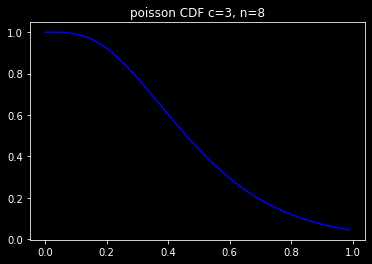

In [122]:
# http://myplace.frontier.com/~stevebrainerd1/STATISTICS/ECE-580-DOE%20WEEK%203_files/class2_oc_curve.pdf

# deterministic
n = 8 # jumlah sample dari lot
c = k = x = 3 # jumlah defects bisa diterima

dict_result = {}
for p_ in range(100):
    p = p_/100
    lambda_ = n*p
    poisson_2_hc = Poisson(k, lambda_) # poisson.pmf(x, mu)
    P = round(poisson_2_hc.poisson_c_sp(),4)
    dict_result[p] = P

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('POISSON')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.03:", round(dict_result[0.03],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.3:", round(dict_result[0.3],4))
print("P on p=0.5:", round(dict_result[0.5],4))
print("P on p=0.7:", round(dict_result[0.7],4))
print("P on p=0.9:", round(dict_result[0.9],4))

# plt.bar(dict_result.keys(), dict_result.values(), width=.01, color='b')
plt.plot(dict_result.keys(), dict_result.values(), color='b')
plt.title('poisson CDF c={}, n={}'.format(c, n))


POISSON
n: 8
c: 3
Maximum value on 0.0 : 1.0
P on p=0.03: 0.9981
P on p=0.05: 0.9921
P on p=0.1: 0.9526
P on p=0.3: 0.5697
P on p=0.5: 0.2381
P on p=0.7: 0.0824
P on p=0.9: 0.0255


Text(0.5, 1.0, 'poisson CDF c=3, n=8')

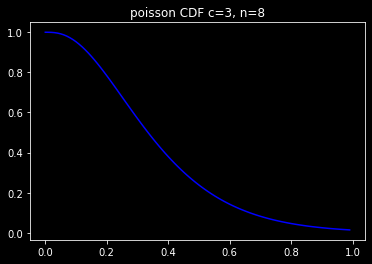

In [123]:
# http://myplace.frontier.com/~stevebrainerd1/STATISTICS/ECE-580-DOE%20WEEK%203_files/class2_oc_curve.pdf

# deterministic
n = 8 # jumlah sample dari lot
c = k = x = 3 # jumlah defects bisa diterima

dict_result = {}
for p_ in range(100):
    p = p_/100
    lambda_ = n*p
    poisson_2_hc = Poisson(k, lambda_) # poisson.pmf(x, mu)
    P = round(poisson_2_hc.poisson_c_hc(),4)
    dict_result[p] = P

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('POISSON')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.03:", round(dict_result[0.03],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.3:", round(dict_result[0.3],4))
print("P on p=0.5:", round(dict_result[0.5],4))
print("P on p=0.7:", round(dict_result[0.7],4))
print("P on p=0.9:", round(dict_result[0.9],4))

# plt.bar(dict_result.keys(), dict_result.values(), width=.01, color='b')
plt.plot(dict_result.keys(), dict_result.values(), color='b')
plt.title('poisson CDF c={}, n={}'.format(c, n))


# How to Read an OC curve
https://accendoreliability.com/how-to-read-an-oc-curve/

POISSON
n: 50
c: 0
Maximum value on 0.0 : 1.0
P on p=0.005: 0.7788
P on p=0.010: 0.6065
P on p=0.015: 0.4724
P on p=0.020: 0.3679
P on p=0.05: 0.0821
P on p=0.1: 0.0067
P on p=0.15: 0.0006


Text(0.5, 1.0, 'poisson scipy CDF, n=50, c=0')

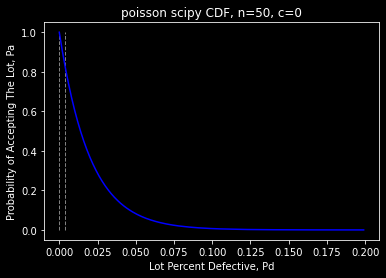

In [124]:
# https://accendoreliability.com/how-to-read-an-oc-curve/
# deterministic
n = 50 # jumlah sample dari lot
c = k = x = 0 # jumlah defects bisa diterima

dict_result = {}
for p_ in range(200):
    p = p_/1000
    lambda_ = n*p
    poisson_2_hc = Poisson(k, lambda_) # poisson.pmf(x, mu)
    P = round(poisson_2_hc.poisson_c_sp(),4)
    dict_result[p] = P

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('POISSON')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.005:", round(dict_result[0.005],4))
print("P on p=0.010:", round(dict_result[0.010],4))
print("P on p=0.015:", round(dict_result[0.015],4))
print("P on p=0.020:", round(dict_result[0.020],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.15:", round(dict_result[0.15],4))

line_x1 = [0.01/100, 0.01/100]
line_x2 = [0.4/100, 0.4/100]
line_y = [0.0, 1.0]

plt.plot(line_x1, line_y, '--', color='grey', linewidth=1)
plt.plot(line_x2, line_y, '--', color='grey', linewidth=1)    

# plt.bar(dict_result.keys(), dict_result.values(), width=.01, color='b')
plt.plot(dict_result.keys(), dict_result.values(), color='b')
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Percent Defective, Pd')
plt.title('poisson scipy CDF, n={}, c={}'.format(n, c))


POISSON
n: 50
c: 2
Maximum value on 0.0 : 1.0
P on p=0.005: 0.9978
P on p=0.010: 0.9856
P on p=0.015: 0.9595
P on p=0.020: 0.9197
P on p=0.05: 0.5438
P on p=0.1: 0.1247
P on p=0.15: 0.0203


Text(0.5, 1.0, 'poisson scipy CDF, n=50, c=2')

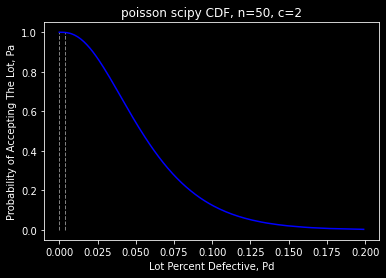

In [125]:
# https://accendoreliability.com/how-to-read-an-oc-curve/
# deterministic
n = 50 # jumlah sample dari lot
c = k = x = 2 # jumlah defects bisa diterima

dict_result = {}
for p_ in range(200):
    p = p_/1000
    lambda_ = n*p
    poisson_2_hc = Poisson(k, lambda_) # poisson.pmf(x, mu)
    P = round(poisson_2_hc.poisson_c_sp(),4)
    dict_result[p] = P

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('POISSON')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
print("P on p=0.005:", round(dict_result[0.005],4))
print("P on p=0.010:", round(dict_result[0.010],4))
print("P on p=0.015:", round(dict_result[0.015],4))
print("P on p=0.020:", round(dict_result[0.020],4))
print("P on p=0.05:", round(dict_result[0.05],4))
print("P on p=0.1:", round(dict_result[0.1],4))
print("P on p=0.15:", round(dict_result[0.15],4))

line_x1 = [0.01/100, 0.01/100]
line_x2 = [0.4/100, 0.4/100]
line_y = [0.0, 1.0]

plt.plot(line_x1, line_y, '--', color='grey', linewidth=1)
plt.plot(line_x2, line_y, '--', color='grey', linewidth=1)      

# plt.bar(dict_result.keys(), dict_result.values(), width=.01, color='b')
plt.plot(dict_result.keys(), dict_result.values(), color='b')
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Percent Defective, Pd')
plt.title('poisson scipy CDF, n={}, c={}'.format(n, c))


POISSON
n: 20
c: 0
Maximum value on 0.0 : 1.0


Text(0.5, 1.0, 'poisson scipy CDF, lot size=100, n=20, c=0')

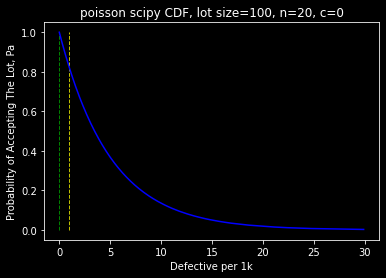

In [126]:
# https://accendoreliability.com/how-to-read-an-oc-curve/
# deterministic
# Lot size = 100, G-II > F > 20 sample > sampai AQL <= 0.65

lot_size = 100
n = 20 # jumlah sample dari lot
c = k = x = 0 # jumlah defects bisa diterima

dict_result = {}
for p_ in range(300):
    p = p_/1000
    defective_per_1k = p * lot_size
    lambda_ = n*p
    poisson_2_hc = Poisson(k, lambda_) # poisson.pmf(x, mu)
    P = round(poisson_2_hc.poisson_c_sp(),4)
    dict_result[defective_per_1k] = P

key_max = max(dict_result, key=dict_result.get)
value_max = max(dict_result.values())
print('POISSON')
print("n:", n)
print("c:", c)
print("Maximum value on",key_max, ":", value_max)
# print("P on p=0.005:", round(dict_result[0.005],4))
# print("P on p=0.010:", round(dict_result[0.010],4))
# print("P on p=0.015:", round(dict_result[0.015],4))
# print("P on p=0.020:", round(dict_result[0.020],4))
# print("P on p=0.05:", round(dict_result[0.05],4))
# print("P on p=0.1:", round(dict_result[0.1],4))
# print("P on p=0.15:", round(dict_result[0.15],4))

line_x1 = [0.01*lot_size/100, 0.01*lot_size/100]
line_x2 = [1*lot_size/100, 1*lot_size/100]
line_y = [0.0, 1.0]

plt.plot(line_x1, line_y, '--', color='g', linewidth=1)   
plt.plot(line_x2, line_y, '--', color='y', linewidth=1)   

# plt.bar(dict_result.keys(), dict_result.values(), width=.01, color='b')
plt.plot(dict_result.keys(), dict_result.values(), color='b')
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Defective per 1k')
plt.title('poisson scipy CDF, lot size={}, n={}, c={}'.format(lot_size, n, c))


# TEST Case PT. SMS

P on p=0.05: 0.8574
P on p=0.05: 0.7351
P on p=0.05: 0.3972
P on p=0.05: 0.0044
P on p=0.05: 0.6634


Text(0.5, 1.0, 'binom scipy CDF, w/ accept number k=0')

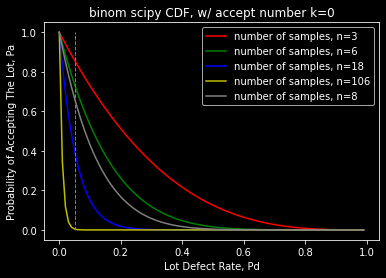

In [127]:
# F-B18048B Gunung Sugih Baru to Rajabasa Permai
# BINOMIAL
# n = jumlah sample dari lot
k = 0 # jumlah defects bisa diterima

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y', 'grey']
color_iter = iter(color_list)

for n in [3,6,18,106,8]:
    dict_result = {}
    for p_ in range(100):
        p = p_/100
        binom_simul_cdf = Binom(n, p, k) # Binom(n, p, k)
        dict_result[p] = round(binom_simul_cdf.binom_cdf_sp(),4)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    # print("P on p=0.03:", round(dict_result[0.03],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    # print("P on p=0.1:", round(dict_result[0.1],4))
    # print("P on p=0.2:", round(dict_result[0.2],4))
    # print("P on p=0.3:", round(dict_result[0.3],4))
    # print("P on p=0.5:", round(dict_result[0.5],4))
    # print("P on p=0.7:", round(dict_result[0.7],4))
    # print("P on p=0.9:", round(dict_result[0.9],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('number of samples, n='+str(n))

line_x = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF, w/ accept number k={}'.format(k))


P on p=0.05: 0.8574
P on p=0.05: 0.7738
P on p=0.05: 0.4877
P on p=0.05: 0.0135


Text(0.5, 1.0, 'binom scipy CDF, w/ accept number k=0')

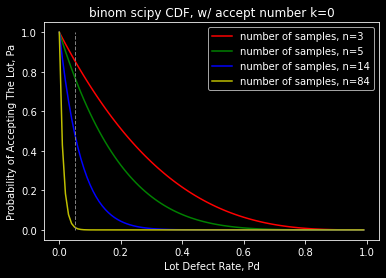

In [128]:
# F-B18047B Gunung Sugih Baru to NLMP_0110
# BINOMIAL
# n = jumlah sample dari lot
k = 0 # jumlah defects bisa diterima

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y']
color_iter = iter(color_list)

for n in [3,5,14,84]:
    dict_result = {}
    for p_ in range(100):
        p = p_/100
        binom_simul_cdf = Binom(n, p, k) # Binom(n, p, k)
        dict_result[p] = round(binom_simul_cdf.binom_cdf_sp(),4)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    # print("P on p=0.03:", round(dict_result[0.03],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    # print("P on p=0.1:", round(dict_result[0.1],4))
    # print("P on p=0.2:", round(dict_result[0.2],4))
    # print("P on p=0.3:", round(dict_result[0.3],4))
    # print("P on p=0.5:", round(dict_result[0.5],4))
    # print("P on p=0.7:", round(dict_result[0.7],4))
    # print("P on p=0.9:", round(dict_result[0.9],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('number of samples, n='+str(n))

line_x = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF, w/ accept number k={}'.format(k))


P on p=0.05: 0.8607
P on p=0.05: 0.7408
P on p=0.05: 0.4066
P on p=0.05: 0.005


Text(0.5, 1.0, 'poisson scipy CDF, w/ accept number k=0')

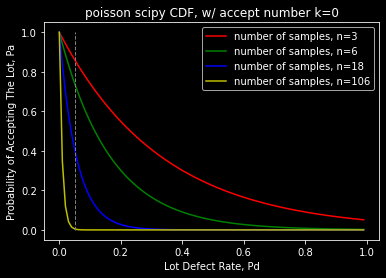

In [129]:
# F-B18048B Gunung Sugih Baru to Rajabasa Permai
# POISSON
# n = jumlah sample dari lot
k = 0 # jumlah defects bisa diterima

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y', 'grey']
color_iter = iter(color_list)

for n in [3,6,18,106]:
    dict_result = {}
    for p_ in range(100):
        p = p_/100
        lambda_ = n*p
        poisson_2_hc = Poisson(k, lambda_) # poisson.pmf(x, mu)
        P = round(poisson_2_hc.poisson_c_sp(),4)
        dict_result[p] = P

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    # print("P on p=0.03:", round(dict_result[0.03],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    # print("P on p=0.1:", round(dict_result[0.1],4))
    # print("P on p=0.2:", round(dict_result[0.2],4))
    # print("P on p=0.3:", round(dict_result[0.3],4))
    # print("P on p=0.5:", round(dict_result[0.5],4))
    # print("P on p=0.7:", round(dict_result[0.7],4))
    # print("P on p=0.9:", round(dict_result[0.9],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('number of samples, n='+str(n))

line_x = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('poisson scipy CDF, w/ accept number k={}'.format(k))


P on p=0.05: 0.8607
P on p=0.05: 0.7788
P on p=0.05: 0.4966
P on p=0.05: 0.015


Text(0.5, 1.0, 'poisson scipy CDF, w/ accept number k=0')

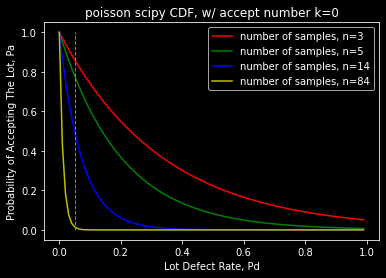

In [130]:
# F-B18047B Gunung Sugih Baru to NLMP_0110
# POISSON
# n = jumlah sample dari lot
k = 0 # jumlah defects bisa diterima

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y', 'grey']
color_iter = iter(color_list)

for n in [3,5,14,84]:
    dict_result = {}
    for p_ in range(100):
        p = p_/100
        lambda_ = n*p
        poisson_2_hc = Poisson(k, lambda_) # poisson.pmf(x, mu)
        P = round(poisson_2_hc.poisson_c_sp(),4)
        dict_result[p] = P

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    # print("P on p=0.03:", round(dict_result[0.03],4))
    print("P on p=0.05:", round(dict_result[0.05],4))
    # print("P on p=0.1:", round(dict_result[0.1],4))
    # print("P on p=0.2:", round(dict_result[0.2],4))
    # print("P on p=0.3:", round(dict_result[0.3],4))
    # print("P on p=0.5:", round(dict_result[0.5],4))
    # print("P on p=0.7:", round(dict_result[0.7],4))
    # print("P on p=0.9:", round(dict_result[0.9],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('number of samples, n='+str(n))

line_x = [0.05, 0.05]
line_y = [0.0, 1.0]

plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('poisson scipy CDF, w/ accept number k={}'.format(k))


# General Inspection Level: II

P on p=0.065: 0.963
P on p=0.065: 0.909
P on p=0.065: 0.952
P on p=0.065: 0.9626
P on p=0.065: 0.2608


Text(0.5, 1.0, 'binom scipy CDF')

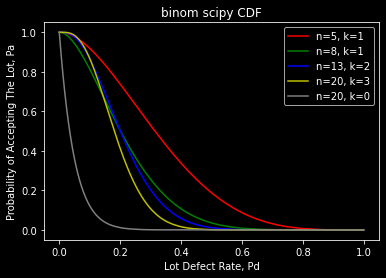

In [131]:
# n = jumlah sample dari lot
# k = jumlah defects bisa diterima

# BINOMIAL

list_sampling_plan = [[5,1], [8,1], [13,2], [20,3], [20,0]] # [n,k]
# list_sampling_plan = [[5,1], [8,1], [13,2], [20,3]] # [n,k]

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y', 'grey']
color_iter = iter(color_list)

for i in list_sampling_plan:
    dict_result = {}
    for p_ in range(1000):
        p = p_/1000
        dict_result[p] = round(binom.cdf(i[1], i[0], p),4) # binom.cdf(k, n, p)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    print("P on p=0.065:", round(dict_result[0.065],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('n={}, k={}'.format(i[0], i[1]))

line_x = [0.065, 0.065]
line_y = [0.0, 1.0]

# plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('binom scipy CDF')


P on p=0.065: 0.9573
P on p=0.065: 0.9037
P on p=0.065: 0.9459
P on p=0.065: 0.9569
P on p=0.065: 0.2725


Text(0.5, 1.0, 'poisson scipy CDF')

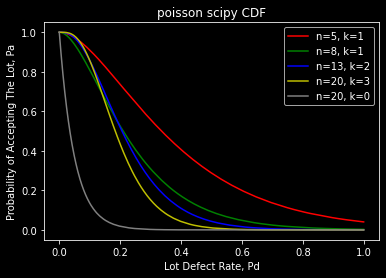

In [132]:
# n = jumlah sample dari lot
# k = jumlah defects bisa diterima

# PIOSSON

list_sampling_plan = [[5,1], [8,1], [13,2], [20,3], [20,0]] # [n,k]

list_collection = []
list_legend = []
# color = iter(cm.rainbow(np.linspace(0, 1, n)))
color_list = ['r', 'g', 'b', 'y', 'grey']
color_iter = iter(color_list)

for i in list_sampling_plan:
    for p_ in range(1000):
        p = p_/1000
        lambda_ = i[0]*p
        dict_result[p] = round(poisson.cdf(i[1], lambda_),4) # poisson.cdf(k, lambda_)

    key_max = max(dict_result, key=dict_result.get)
    value_max = max(dict_result.values())
    # print('BINOMIAL')
    # print("n:", n)
    # print("k:", k)
    # print("Maximum value on",key_max, ":", value_max)
    print("P on p=0.065:", round(dict_result[0.065],4))
    col = next(color_iter)
    plt.plot(dict_result.keys(), dict_result.values(), color=col, label = k)
    list_legend.append('n={}, k={}'.format(i[0], i[1]))

line_x = [0.065, 0.065]
line_y = [0.0, 1.0]

# plt.plot(line_x, line_y, '--', color='grey', linewidth=1)    
plt.legend(list_legend)
plt.ylabel('Probability of Accepting The Lot, Pa')
plt.xlabel('Lot Defect Rate, Pd')
plt.title('poisson scipy CDF')


# Producer's & Consumer's Risk